# 알고리즘 : LogisticRegression
### 미션 : 타이타닉 승객 정보 데이터셋을 이용해 생존 여부를 예측해라
### 종속 변수 : Survived(셍존 여부)
### 평가 지표 : 정확도
### 문제 유형 : 분류(classification)

지도학습 알고리즘 2
로지스틱 회귀
학습 순서
1. 문제정의 -> 2. 라이브러리 및 데이터 불러오기 -> 3. 데이터 확인하기 -> 4. 전처리: 범주 변수 변환하기(더미변수와 원-핫 인코딩) -> 5. 데이터 모델링 및 예측하기 -> 6. 예측 모델 평가하기 -> 7. 이해하기 (피쳐 엔지니어링, 로지스틱 회귀 분석)

정의 : 가장 기초적인 머신러닝. 선형 회귀분석과 유사하지만, 선형 회귀 분석은 연속된 변수를 예측하는 반면, 로지스틱 회귀분석은 Y/N처럼 두가지 이진 분류 문제를 다룬다.

장점 : 모델이 간단해 구현 쉽고, 짧은 시간에 가능, 계수(기울기)를 사용해 각 변수의 중요성을 쉽게 파악 가능
단점 : 선형회귀 분석을 근간으로 하고 있기 때문에, 선형 관계가 아닌 데이터에 대한 예측력이 떨어짐
유용한 곳 : Y/N, True/False 같은 두 가지 범주로 나뉜 값을 예측하는 데 사용. 분류 문제에 있어서 기준선으로 자주 활용 (타모델과 비교 목적)

데이터 클리닝 : 지저분한 데이터를 정리하는 과정. 결측치 제거, 오탈자 수정, 불필요한 문자 제거 등
피처 엔지니어링 : 가지고 독립변수들을 활용해서 더욱 풍성하고 유용한 독립변수들을 만들어 내는 작업

In [1]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

5.3 데이터 확인하기

In [3]:
data.head()
#Pclass : 티켓 클래스
#SibSp : 함께 탑승한 형제 및 배우자 수
#Parch : 함계 탑승한 부모 및 자녀의 수
#Survived : 생존여부 1 = 생존 0 = 사망

# 8개의 독립변수 와 1개의 종속 변수 (Survived)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [6]:
data.describe()
# 알수 있는 점
# Pclass의 경우 1,2,3 세가지 클래스 존재
# 나이를 보면 대부분 35세 미만이지만 최고 80 까지 있음
# Sibsp, Parch 의 50프로 75프로를 보면 대부분 혼자 탑승

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [8]:
#상관관계 출력
data.corr()

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_6884/357238254.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


# 상관관계
- 두 변수 간의 관련성. 변수 a가 증가할 때, 변수 b가 증가하면 상관관계가 있다고 할수 있음. 
- 반대로 a가 증가 할 때 b가 감소하면 음의 방향으로 상관관계가 있다. 
- 위 예를 들면 Parch 와 SibSp가 상관관계가 가장 높음. 
- -1 ~ +1 사이 값을 가짐 
- 히트맵 사용하면 더 잘 보임

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_6884/79179691.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


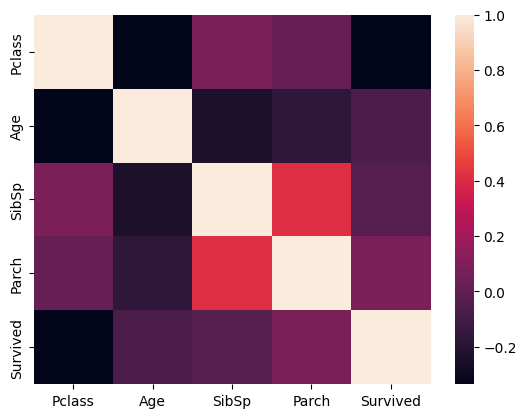

In [10]:
sns.heatmap(data.corr())
plt.show() #matplotlib과 seaborn이 최근 버전이면 제외해도 상관없음


/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_6884/1387424951.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm')


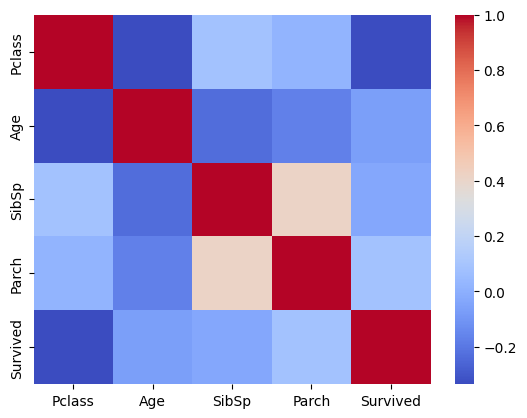

In [11]:
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_6884/209060984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', vmin = -1, vmax = +1, annot = True)


<AxesSubplot: >

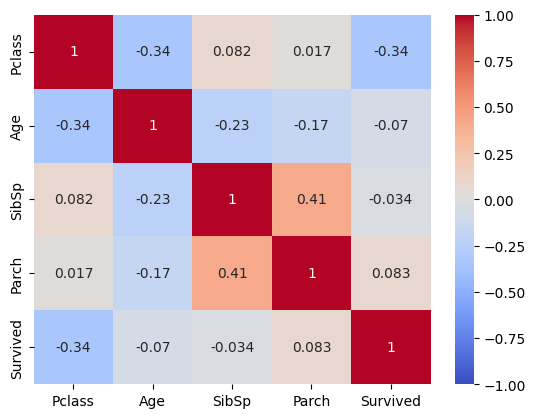

In [12]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin = -1, vmax = +1, annot = True)

#5.4 전처리 : 카테고리 변수 변환하기(더미 변수와 원-핫 인코딩)
- 타이타닉 데이터 셋에는 자료형이 object인 변수들, 즉 숫자가 아닌 문자인 변수가 4개 존재
- 예를들어 계절을 1,2,3,4로 표현하는것은 특히 선형보델에서 피해야함. 서열이 될수도 있음

1. 더미변수 :  변수의 값을 변수로 변환. 새로 더미를 추가 ex)sex-male , sex-female해서 해당값에 1, 해당하지 않으면 0

nunique함수로 고윳값 개수를 확인

In [13]:
data['Name'].nunique()

889

In [14]:
data['Sex'].nunique()

2

In [15]:
data["Ticket"].nunique()

680

In [18]:
data['Embarked'].nunique()

3

In [19]:
#Ticket, Name변수를 제외하고 남은 object형을 원핫 인코딩
data = data.drop(["Name","Ticket"], axis = 1)

In [20]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [21]:
pd.get_dummies(data,columns = ["Sex", "Embarked"])
#괄호 안에 데이터프레임(여기서는 data)을 먼저 써주고, columns라는 매개변수에 변환시킬 컬럼명을 리스트 형태로 입력

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,0,1,0,0,1
1,1,38.0,1,0,1,1,0,1,0,0
2,3,26.0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,1,1,0,0,0,1
4,3,35.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,0,1,0,0,1
885,1,19.0,0,0,1,1,0,0,0,1
886,3,28.0,1,2,0,1,0,0,0,1
887,1,26.0,0,0,1,0,1,1,0,0


In [23]:
#고윳값 개수보다 하나를 덜 사용해도 구분하는데 문제는 없음
pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)


,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,1,0,1
885,1,19.0,0,0,1,0,0,1
886,3,28.0,1,2,0,0,0,1
887,1,26.0,0,0,1,1,0,0


In [24]:
data = pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

5.5 모델링 및 예측하기

In [25]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis = 1) #데이터 셋에서 종속변수 제거 후 저장
y = data['Survived'] #데이터셋에서 종속변수만 저장
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
pred = model.predict(X_test)

5.6 예측 모델 평가하기

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)
# 78프로면 그럭저럭

0.7808988764044944

# 이진분류의 평가지표
- 정확도 (Accuracy) : 예측값과 실젯값을 비교하여 얼마나 맞추나 확인. 
- 오차 행렬
- 정밀도 (Precision)
- 재현율 (Recall)
- F1 Score 
- 민감도
- 특이도
- AUC

**정확도는 상황에 따라 다르게 고려해야한다. 
가령 0 이 95프로이고 1이 5프로로 구성된 이진분류라면 정확도가 90이어도 성과가 좋지 않다고 판단

In [30]:
model.coef_

array([[-1.18229433, -0.03992144, -0.32130675,  0.00796941, -2.56870847,
        -0.07884931, -0.2355646 ]])

In [32]:
# 선형회귀 할 때 "array" 안에 []인데. 2중 리스트 형태인 [[]] 이다. 
# 4장같이 코드 치면 아래와 같이 에러
# 에러내용은 model.coef_ 길이는 1 인데, 인텍스 X.columns길이는 7이어서 안된다. 즉 X.columns 값을 7개 값으로 지정했으니, model_coef_길이가 7이어야한다 
pd.Series(model.coef_, index = X.columns)

ValueError: Length of values (1) does not match length of index (7)

In [33]:
len(model.coef_)

1

In [34]:
len(model.coef_[0])

7

In [35]:
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.182294
Age          -0.039921
SibSp        -0.321307
Parch         0.007969
Sex_male     -2.568708
Embarked_Q   -0.078849
Embarked_S   -0.235565
dtype: float64

- Parch제외하고 모두 음수
- 1이 생존 0이 사망
- Pclass가 높을 수록 생존 가능성 낮음 (더 싼 티켓일수록 생존율 업)
- 여성이 생존 가능성 높고
- 나이는 낮을수록 생존 가능성 높고

#### ***로지스틱 회귀 분석에서는 계수를 단순하게 기울기 값처럼 곱하여 수식을 만들면 안됨!!! 로지스틱 회귀 분석이 선형 회귀분석에서 한단계 계산을 더 거치기 떄문. 

5.7 이해하기 : 피처 엔지니어링

- 피처 엔지니어링은 기존 데이터를 손보아 더 나은 변수를 만드는 기법 (매우 중요)
- 적합한 머신러닝 알고리즘을 선택하고 하이퍼파라미터를 튜닝하는 일도 중요하지만, 좋은 피처를 하나 더 마련하는 일만큼 강력한 무기는 없다. 
- 피처 엔지니어링에서는 도메인 지식의 활용이 중요
- 선형 회귀 분석과 로지스틱 회귀 분석을 선형 모델이라고 하는데, 이러한 모델에서는 다중공선성(Multicolllinearity) 를 주의해야한다. 이는 독립변수 사이에 상관관계가 높은 때에 발생하는 문제. 예를들어 두 독립변수 a,b는 모두 목표 변수를 양의 방향으로 이끄는 계수를 가지고 있을 때 a와 b의 상관관계가 매우 높다면, y의 증가 이유가 a때문인지 b때문인지 명확하지 않다. 
- 이때 하나를 제거하거나, 둘을 모두 포괄시키는 새로운 변수를 만들거나, PCA(Principal Component Analysis) 같은 방법으로 차원 축소를 수행해 해결 가능. 
- 타이타닉의 경우 Parch와 SibSp가 그나마 강한 상관관계를 보이기 때문에 새로운 변수를 만들어보자

In [36]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch'], axis=1, inplace=True)

In [37]:
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,1,0,1,1
1,1,38.0,1,0,0,0,1
2,3,26.0,1,0,0,1,0
3,1,35.0,1,0,0,1,1
4,3,35.0,0,1,0,1,0


In [38]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

- 기존 정확도 보다 조금 더 올라갔음
- 다양한 시도로 더 나은 결과를 찾는 과정.
- 여기서 0.4 정도의 상관관계가 있는 변수를 합쳐주면 더 좋은 결과를 얻을수 있을 것이다. 

5.8 이해하기: 로지스틱 회귀
- 왜 이진분류 문제에 선형회귀를 하지 않았을까? 적용할수는 있는데, 예상하는 형태가 아님

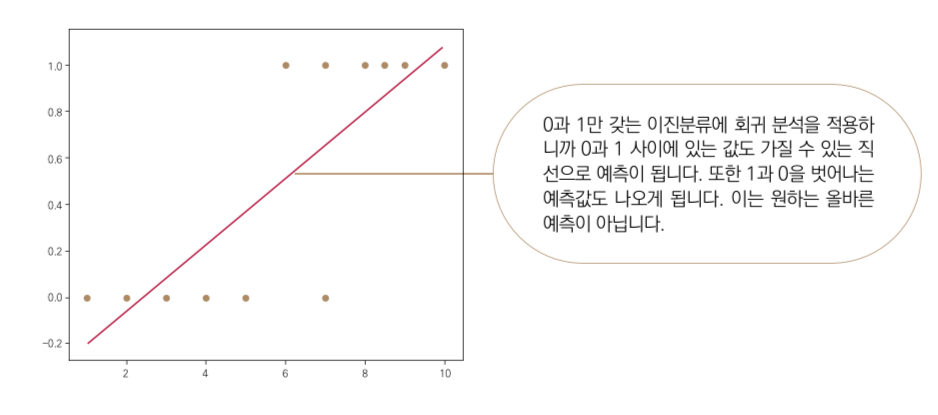

In [43]:
from IPython.display import Image
Image('images/2.jpeg')

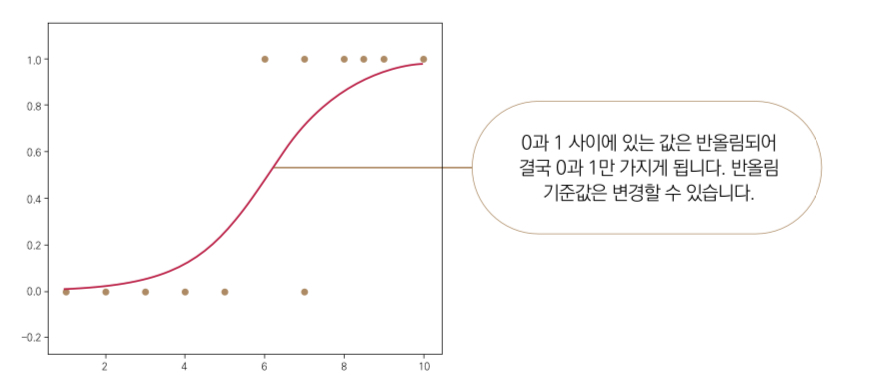

In [44]:
Image('images/3.jpeg')
# 0,1 두개 가 아니라 0.4 도 나옴. 즉 생존 확율이 0.4 라고 판단 하면 됨

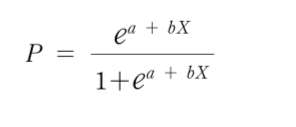

In [45]:
# e는 자연로그 2.718, 지수부 a+bX는 1차함수 형태와 같음. 즉 로지스틱 회귀분석은 선형 회귀 분석의 공식을 한번 더 변환함
Image('images/4.jpeg')